# Proyek Analisis Data: Bike Sharing Public Dataset
- **Nama:** Muhammad Farhan Juna
- **Email:** muhammadfarhan.mf711@gmail.com
- **ID Dicoding:** muhammadfarhanjuna

## Menentukan Pertanyaan Bisnis

- Apakah terdapat pengaruh kondisi cuaca terhadap jumlah pengguna sepeda?
- Bagaimana pola penggunaan sepeda pada hari kerja (working day), hari libur (holiday), dan hari biasa (weekday)?
- Bagaimana tren penggunaan sepeda selama setahun? Apakah penggunaan lebih tinggi di tahun 2011 atau 2012?
- Bagaimana faktor-faktor seperti suhu (temp dan atemp) serta kelembaban (humidity) memengaruhi jumlah total pengguna sepeda, baik untuk kategori Casual maupun Registered?
- Apakah musim memiliki pengaruh terhadap jumlah penyewa sepeda, dilihat dari perbedaan antara pelanggan Casual dan Registered?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import matplotlib.image as mpimg
from scipy import stats
from google.colab import drive
import zipfile
import os
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Connect GDrive for Access Dataset
drive.mount("/content/drive")

# Extract Zip
zip_path = '/content/drive/MyDrive/Bike-sharing-dataset.zip'
extract_to = '/content/Bike Sharing Dataset/'

# Check if the zip file exists
if not os.path.exists(zip_path):
    raise FileNotFoundError(f"Zip file not found at: {zip_path}. Please ensure the file exists and the path is correct.")

# Directory to extract to
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

path = '/content/Bike Sharing Dataset/'

Mounted at /content/drive


In [3]:
# Read CSV File
df_day = pd.read_csv(path + 'day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
# Read CSV File
df_hour = pd.read_csv(path + 'hour.csv')
df_hour.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Dataframe df_day berisi data harian tentang penyewaan sepeda.
Kolom-kolomnya antara lain dteday (tanggal), season (musim), yr (tahun), mnth (bulan), holiday (hari libur), weekday (hari dalam seminggu), workingday (hari kerja), weathersit (kondisi cuaca), temp (suhu ternormalisasi), atemp (suhu yang dirasakan ternormalisasi), hum (kelembaban ternormalisasi), windspeed (kecepatan angin ternormalisasi), casual (jumlah pengguna kasual), registered (jumlah pengguna terdaftar), dan cnt (jumlah total penyewaan).
Dataframe ini dapat digunakan untuk menganalisis tren penyewaan sepeda berdasarkan hari, musim, cuaca, dan faktor-faktor lainnya.

- Dataframe df_hour berisi data per jam tentang penyewaan sepeda.
Kolom-kolomnya mirip dengan df_day, tetapi dengan tambahan kolom hr (jam) dan tanpa kolom casual dan registered.
Dataframe ini dapat digunakan untuk menganalisis tren penyewaan sepeda berdasarkan jam, hari, musim, cuaca, dan faktor-faktor lainnya.

### Assessing Data

In [5]:
# function for print assesing data
def info_df(df):
    print(f"\n---Info Data---\n")
    df.info()

    # Print missing values table
    print(f"\n---Missing Value Data---\n")
    print(df.isna().sum())

    # Print duplicated values count
    print(f"\n---Duplikat Data---\n")
    print(df.duplicated().sum())

    # Print table description
    print(f"\n---Deskripsi Data---\n")
    print(df.describe())

#### Data Frame Day


In [6]:
info_df(df_day)


---Info Data---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB

---Missing Value Data---

instant       0
dteday        0
season        0


**Insight:**
- Dataframe df_day:
- Kolom: Terdiri dari instant, dteday, season, yr, mnth, holiday, weekday, workingday, weathersit, temp, atemp, hum, windspeed, casual, registered, dan cnt.
- Kolom dteday memiliki tipe data yang tidak sesuai.
- Tidak ada data duplikat dan missing value

#### Data Frame Hour


In [7]:
info_df(df_hour)


---Info Data---

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB

---Missing Value Data---

inst

**Insight:**
- Dataframe df_hour:
- Kolom: Sama seperti df_day, dengan tambahan hr.
- Kolom dteday memiliki tipe data yang tidak sesuai.
- Tidak ada data duplikat dan missing value

### Cleaning Data

#### Change dteday type to datetime

In [8]:
# Change Data Type
date_columns = ['dteday']
df_day[date_columns] = df_day[date_columns].apply(pd.to_datetime)
df_hour[date_columns] = df_hour[date_columns].apply(pd.to_datetime)

#### Change type to category

In [9]:
category_columns = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
df_day[category_columns] = df_day[category_columns].astype('category')
df_hour[category_columns] = df_hour[category_columns].astype('category')

In [10]:
# Check Data Type Day
df_day.dtypes

,0
instant,int64
dteday,datetime64[ns]
season,category
yr,int64
mnth,category
holiday,category
weekday,category
workingday,category
weathersit,category
temp,float64


In [11]:
# Check Data Type Hour
df_hour.dtypes

,0
instant,int64
dteday,datetime64[ns]
season,category
yr,int64
mnth,category
hr,int64
holiday,category
weekday,category
workingday,category
weathersit,category


#### Rename Columns

In [12]:
# Change Month january-December
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# Assign the renamed DataFrames back to the original variables
df_day = df_day.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'weekday': 'day_of_week',  # Rename 'weekday' to 'day_of_week'
    'workingday': 'is_workingday',  # Rename 'workingday' to 'is_workingday'
    'weathersit': 'weather_condition',
    'hum': 'humidity',
    'cnt': 'count'
})

df_hour = df_hour.rename(columns={
    'dteday': 'date',
    'hr': 'hour',
    'yr': 'year',
    'mnth': 'month',
    'weekday': 'day_of_week',  # Rename 'weekday' to 'day_of_week'
    'workingday': 'is_workingday',  # Rename 'workingday' to 'is_workingday'
    'weathersit': 'weather_condition',
    'hum': 'humidity',
    'cnt': 'count'
})

# Now you can map the 'month' column
df_day['month'] = df_day['month'].map(month_mapping)
df_hour['month'] = df_hour['month'].map(month_mapping)

# Mapping for weather_condition (Assuming original values are 1, 2, 3, 4)
weather_mapping = {
    1: 'Clear',
    2: 'Mist',
    3: 'Light Rain/Snow',
    4: 'Heavy Rain/Snow'
}

df_day['weather_condition'] = df_day['weather_condition'].map(weather_mapping)
df_hour['weather_condition'] = df_hour['weather_condition'].map(weather_mapping)

# Mapping for day_of_week (Assuming original values are 0-6)
day_mapping = {
    0: 'Sunday',
    1: 'Monday',
    2: 'Tuesday',
    3: 'Wednesday',
    4: 'Thursday',
    5: 'Friday',
    6: 'Saturday'
}

df_day['day_of_week'] = df_day['day_of_week'].map(day_mapping)
df_hour['day_of_week'] = df_hour['day_of_week'].map(day_mapping)

# Define a dictionary for season mapping
season_mapping = {
    1: 'Spring',
    2: 'Summer',
    3: 'Fall',
    4: 'Winter'
}

# Apply the mapping to the 'season' column
df_day['season'] = df_day['season'].map(season_mapping)
df_hour['season'] = df_hour['season'].map(season_mapping)

# Convert 'year' values to actual years
df_day['year'] = df_day['year'].map({0: 2011, 1: 2012})
df_hour['year'] = df_hour['year'].map({0: 2011, 1: 2012})

In [13]:
# Convert 'is_workingday' to 'Working Day' and 'Non-Working Day'
df_day['is_workingday'] = df_day['is_workingday'].map({0: 'Non-Working Day', 1: 'Working Day'})
df_hour['is_workingday'] = df_hour['is_workingday'].map({0: 'Non-Working Day', 1: 'Working Day'})

# Convert 'holiday' to 'Holiday' and 'Non-Holiday'
df_day['holiday'] = df_day['holiday'].map({0: 'Non-Holiday', 1: 'Holiday'})
df_hour['holiday'] = df_hour['holiday'].map({0: 'Non-Holiday', 1: 'Holiday'})

In [14]:
df_day.sample(10)

,instant,date,season,year,month,holiday,day_of_week,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
3,4,2011-01-04,Spring,2011,January,Non-Holiday,Tuesday,Working Day,Clear,0.200000,0.212122,0.590435,0.160296,108,1454,1562
651,652,2012-10-13,Winter,2012,October,Non-Holiday,Saturday,Non-Working Day,Clear,0.393333,0.391396,0.494583,0.146142,2252,4857,7109
348,349,2011-12-15,Winter,2011,December,Non-Holiday,Thursday,Working Day,Mist,0.422500,0.412237,0.634167,0.268042,181,3528,3709
357,358,2011-12-24,Spring,2011,December,Non-Holiday,Saturday,Non-Working Day,Clear,0.302500,0.299242,0.542500,0.190304,155,856,1011
622,623,2012-09-14,Fall,2012,September,Non-Holiday,Friday,Working Day,Clear,0.633333,0.594083,0.672500,0.103863,1379,6630,8009
451,452,2012-03-27,Summer,2012,March,Non-Holiday,Tuesday,Working Day,Clear,0.323333,0.315654,0.290000,0.187192,531,4571,5102
726,727,2012-12-27,Spring,2012,December,Non-Holiday,Thursday,Working Day,Mist,0.254167,0.226642,0.652917,0.350133,247,1867,2114
272,273,2011-09-30,Winter,2011,September,Non-Holiday,Friday,Working Day,Clear,0.564167,0.544829,0.647500,0.206475,830,4372,5202
370,371,2012-01-06,Spring,2012,January,Non-Holiday,Friday,Working Day,Clear,0.334167,0.340267,0.542083,0.167908,307,3791,4098
494,495,2012-05-09,Summer,2012,May,Non-Holiday,Wednesday,Working Day,Mist,0.575000,0.553025,0.744167,0.216412,620,4097,4717


## Exploratory Data Analysis (EDA)

### Explore Data Day

In [15]:
df_day.describe(include="all")

,instant,date,season,year,month,holiday,day_of_week,is_workingday,weather_condition,temp,atemp,humidity,windspeed,casual,registered,count
count,731.000000,731,731,731.000000,731,731,731,731,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,4,NaN,12,2,7,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Fall,NaN,January,Non-Holiday,Sunday,Working Day,Clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,188,NaN,62,710,105,500,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,2012-01-01 00:00:00,NaN,2011.500684,NaN,NaN,NaN,NaN,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,NaN,2011.000000,NaN,NaN,NaN,NaN,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,NaN,2012.000000,NaN,NaN,NaN,NaN,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [16]:
# Average Bike Rentals per Season
seasonal_rentals = df_day.groupby('season')['count'].mean()
print(seasonal_rentals)

season
Spring    2604.132597
Summer    4992.331522
Fall      5644.303191
Winter    4728.162921
Name: count, dtype: float64


<ipython-input-16-7b0f6079b6ab>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_rentals = df_day.groupby('season')['count'].mean()


<ipython-input-17-fd4989045fe0>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_rentals = df_day.groupby('season')['count'].mean().reset_index()


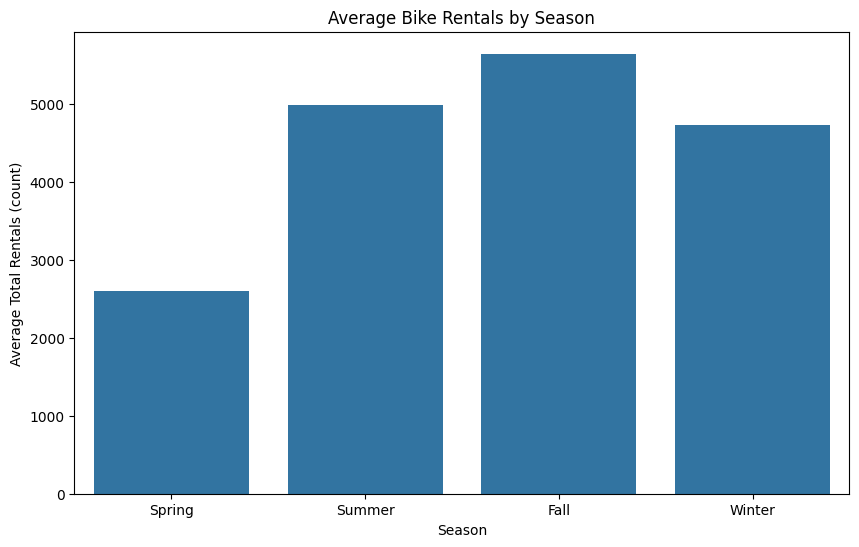

In [17]:
seasonal_rentals = df_day.groupby('season')['count'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='season', y='count', data=seasonal_rentals)
plt.title('Average Bike Rentals by Season')
plt.xlabel('Season')
plt.ylabel('Average Total Rentals (count)')
plt.show()

In [18]:
day_type_rentals = df_day.groupby(['day_of_week', 'is_workingday'])['count'].sum()
print(day_type_rentals)

day_of_week  is_workingday  
Sunday       Non-Working Day    444027
             Working Day             0
Monday       Non-Working Day     59605
             Working Day        395898
Tuesday      Non-Working Day      1013
             Working Day        468096
Wednesday    Non-Working Day      7403
             Working Day        465645
Thursday     Non-Working Day      3920
             Working Day        481475
Friday       Non-Working Day      6494
             Working Day        481296
Saturday     Non-Working Day    477807
             Working Day             0
Name: count, dtype: int64


<ipython-input-18-64984c374734>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_type_rentals = df_day.groupby(['day_of_week', 'is_workingday'])['count'].sum()


<ipython-input-19-bd9b2c5a140d>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_type_rentals = df_day.groupby(['day_of_week', 'is_workingday'])['count'].sum().reset_index()


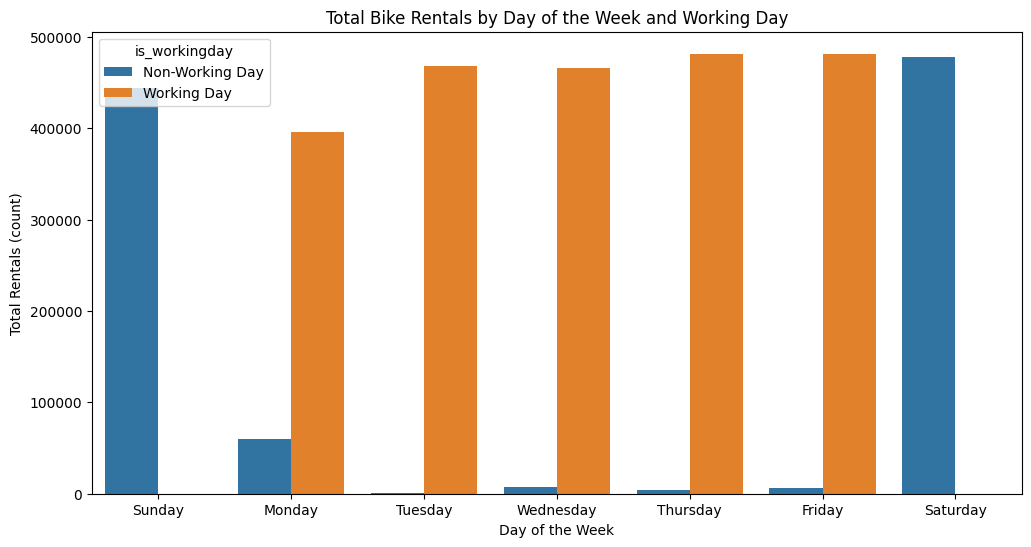

In [19]:
day_type_rentals = df_day.groupby(['day_of_week', 'is_workingday'])['count'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='count', hue='is_workingday', data=day_type_rentals)
plt.title('Total Bike Rentals by Day of the Week and Working Day')
plt.xlabel('Day of the Week')
plt.ylabel('Total Rentals (count)')
plt.show()

In [20]:
weather_rentals = df_day.groupby('weather_condition')['count'].describe()
print(weather_rentals)

                   count         mean          std    min     25%     50%  \
weather_condition                                                           
Clear              463.0  4876.786177  1879.483989  431.0  3636.5  4844.0   
Mist               247.0  4035.862348  1809.109918  605.0  2674.5  4040.0   
Light Rain/Snow     21.0  1803.285714  1240.284449   22.0   705.0  1817.0   

                      75%     max  
weather_condition                  
Clear              6458.5  8714.0  
Mist               5257.5  8362.0  
Light Rain/Snow    2424.0  4639.0  


<ipython-input-20-6d4080052ec5>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_rentals = df_day.groupby('weather_condition')['count'].describe()


<ipython-input-21-cd5ea6832db3>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_user_rentals = df_day.groupby(['weather_condition', 'year'])[['casual', 'registered']].sum().reset_index()


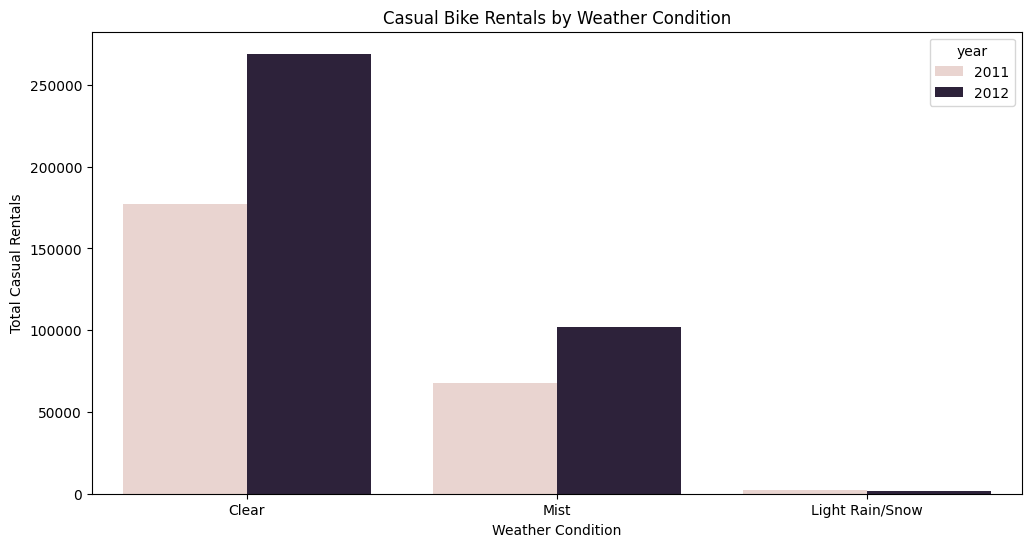

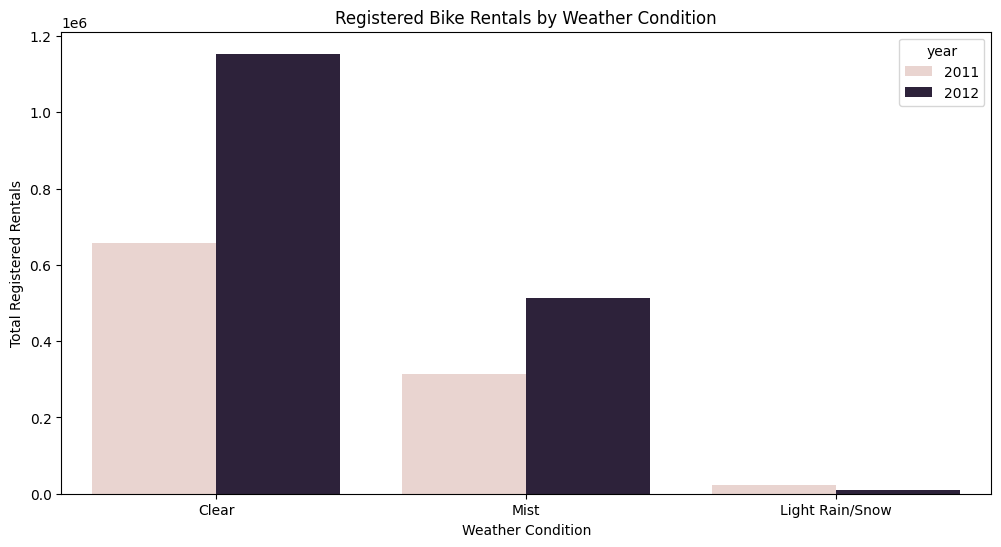

In [21]:
weather_user_rentals = df_day.groupby(['weather_condition', 'year'])[['casual', 'registered']].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='weather_condition', y='casual', hue='year', data=weather_user_rentals)
plt.title('Casual Bike Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Total Casual Rentals')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='weather_condition', y='registered', hue='year', data=weather_user_rentals)
plt.title('Registered Bike Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Total Registered Rentals')
plt.show()

In [22]:
correlation_matrix = df_day[['temp', 'atemp', 'humidity', 'windspeed', 'count']].corr()
print(correlation_matrix)

               temp     atemp  humidity  windspeed     count
temp       1.000000  0.991702  0.126963  -0.157944  0.627494
atemp      0.991702  1.000000  0.139988  -0.183643  0.631066
humidity   0.126963  0.139988  1.000000  -0.248489 -0.100659
windspeed -0.157944 -0.183643 -0.248489   1.000000 -0.234545
count      0.627494  0.631066 -0.100659  -0.234545  1.000000


In [23]:

# Create the necessary directories
os.makedirs("/", exist_ok=True)

# Save the dataframe to CSV
df_day.to_csv("bike-sharing-day.csv", index=False)
df_hour.to_csv("bike-sharing-hour.csv", index=False)

**Insight:**
- xxx
- xxx

## Visualization & Explanatory Analysis

### Pertanyaan 1: Apakah terdapat pengaruh kondisi cuaca terhadap jumlah pengguna sepeda?

<ipython-input-33-323ede19ed5a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_rentals = df_day.groupby('weather_condition')['count'].mean().reset_index()


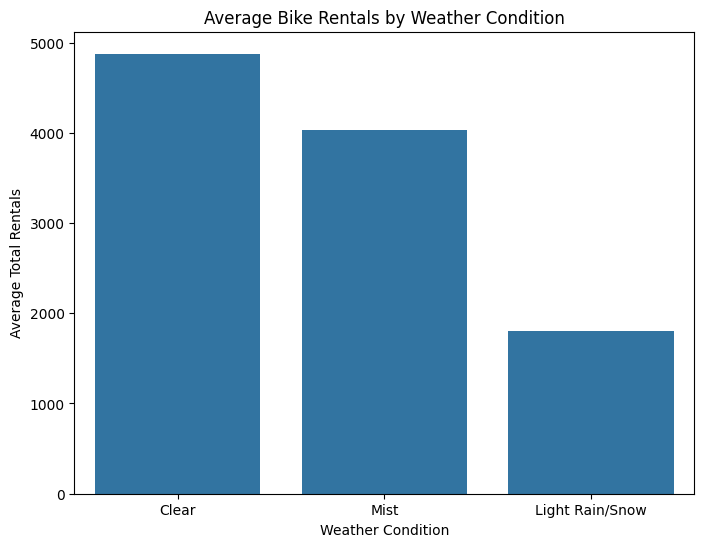

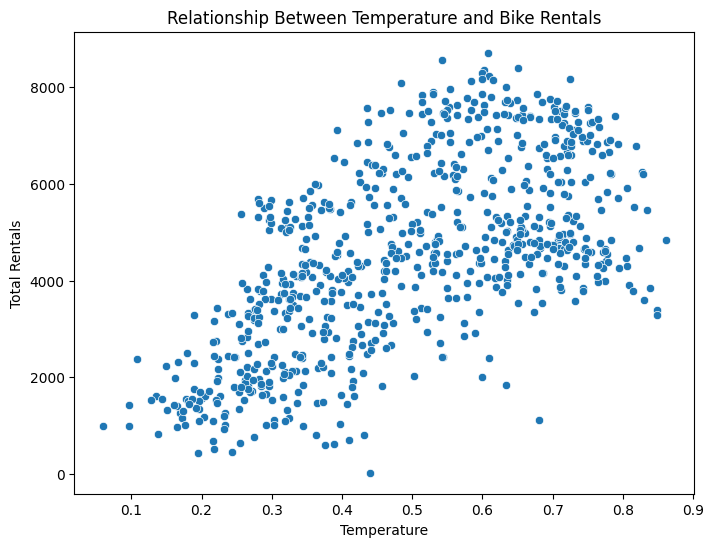

In [33]:
# Group data by weather condition and calculate the average total rentals
weather_rentals = df_day.groupby('weather_condition')['count'].mean().reset_index()

# Create a bar plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.barplot(x='weather_condition', y='count', data=weather_rentals)
plt.title('Average Bike Rentals by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Total Rentals')
plt.show()

plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp', y='count', data=df_day)
plt.title('Relationship Between Temperature and Bike Rentals')
plt.xlabel('Temperature')
plt.ylabel('Total Rentals')
plt.show()

### Pertanyaan 2: Bagaimana pola penggunaan sepeda pada hari kerja (working day), hari libur (holiday), dan hari biasa (weekday)?

<ipython-input-25-a05610eea5d2>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  working_day_rentals = df_day.groupby('is_workingday')['count'].mean().reset_index()


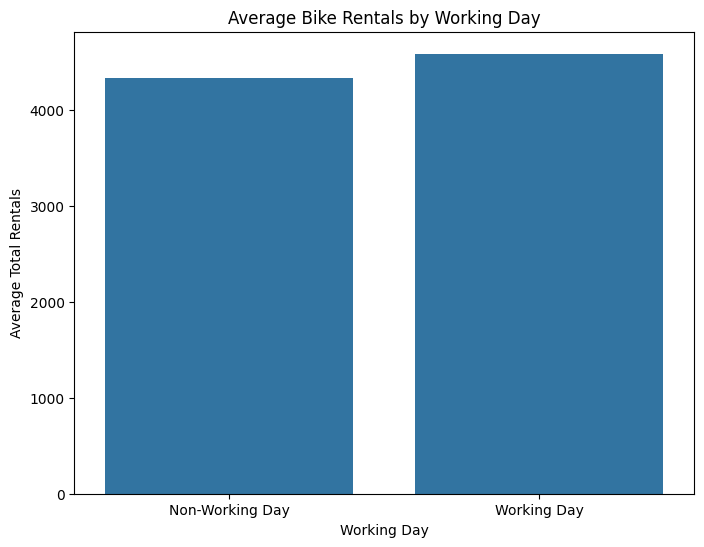

<ipython-input-25-a05610eea5d2>:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  day_of_week_rentals = df_day.groupby('day_of_week')['count'].mean().reset_index()


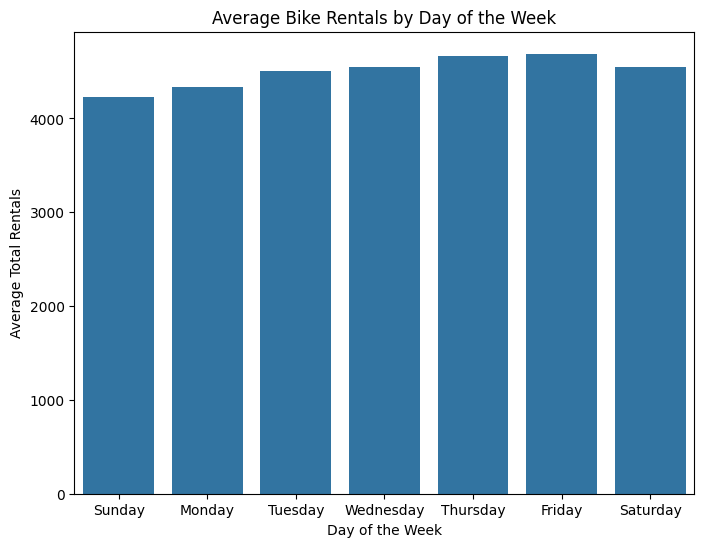

Average rentals on holidays: 3735.0
Average rentals on non-holidays: 4527.104225352113


In [25]:

# Group data by 'is_workingday' and calculate the average total rentals
working_day_rentals = df_day.groupby('is_workingday')['count'].mean().reset_index()

# Create a bar plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.barplot(x='is_workingday', y='count', data=working_day_rentals)
plt.title('Average Bike Rentals by Working Day')
plt.xlabel('Working Day')
plt.ylabel('Average Total Rentals')
plt.show()


# Group data by 'day_of_week' and calculate the average total rentals
day_of_week_rentals = df_day.groupby('day_of_week')['count'].mean().reset_index()

# Create a bar plot to visualize the relationship
plt.figure(figsize=(8, 6))
sns.barplot(x='day_of_week', y='count', data=day_of_week_rentals)
plt.title('Average Bike Rentals by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Total Rentals')
plt.show()

# You can also analyze the rentals on holidays by filtering the data and plotting the 'holiday' column.
holiday_rentals = df_day[df_day['holiday'] == 'Holiday']['count'].mean()
non_holiday_rentals = df_day[df_day['holiday'] == 'Non-Holiday']['count'].mean()

print(f"Average rentals on holidays: {holiday_rentals}")
print(f"Average rentals on non-holidays: {non_holiday_rentals}")


### Pertanyaan 3: Bagaimana tren penggunaan sepeda selama setahun? Apakah penggunaan lebih tinggi di tahun 2011 atau 2012?

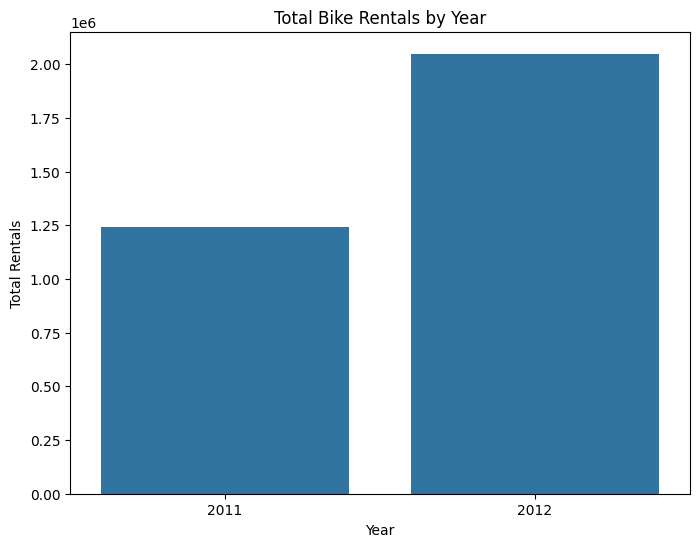

Total rentals in 2011: 1243103
Total rentals in 2012: 2049576
Penggunaan sepeda lebih tinggi di tahun 2012.


In [26]:

# Group data by year and calculate the total rentals
yearly_rentals = df_day.groupby('year')['count'].sum().reset_index()

# Create a bar plot to visualize the trend
plt.figure(figsize=(8, 6))
sns.barplot(x='year', y='count', data=yearly_rentals)
plt.title('Total Bike Rentals by Year')
plt.xlabel('Year')
plt.ylabel('Total Rentals')
plt.show()

# Compare the total rentals for 2011 and 2012
rentals_2011 = df_day[df_day['year'] == 2011]['count'].sum()
rentals_2012 = df_day[df_day['year'] == 2012]['count'].sum()

print(f"Total rentals in 2011: {rentals_2011}")
print(f"Total rentals in 2012: {rentals_2012}")

if rentals_2011 > rentals_2012:
    print("Penggunaan sepeda lebih tinggi di tahun 2011.")
elif rentals_2012 > rentals_2011:
    print("Penggunaan sepeda lebih tinggi di tahun 2012.")
else:
    print("Penggunaan sepeda sama di tahun 2011 dan 2012.")

### Pertanyaan 4: Bagaimana faktor-faktor seperti suhu (temp dan atemp) serta kelembaban (humidity) memengaruhi jumlah total pengguna sepeda, baik untuk kategori Casual maupun Registered?

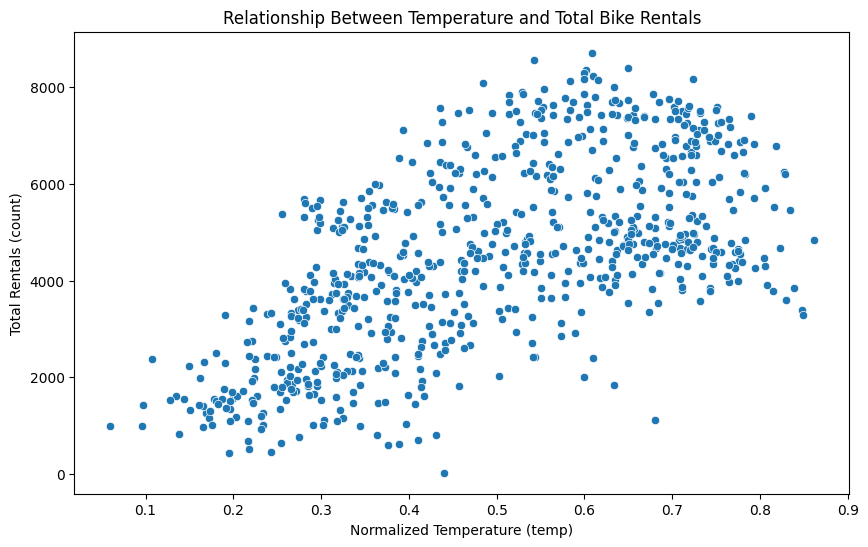

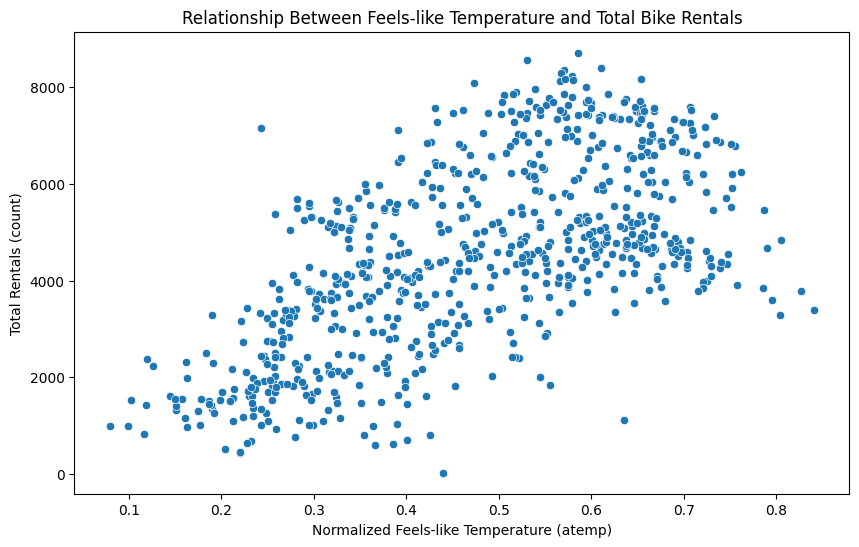

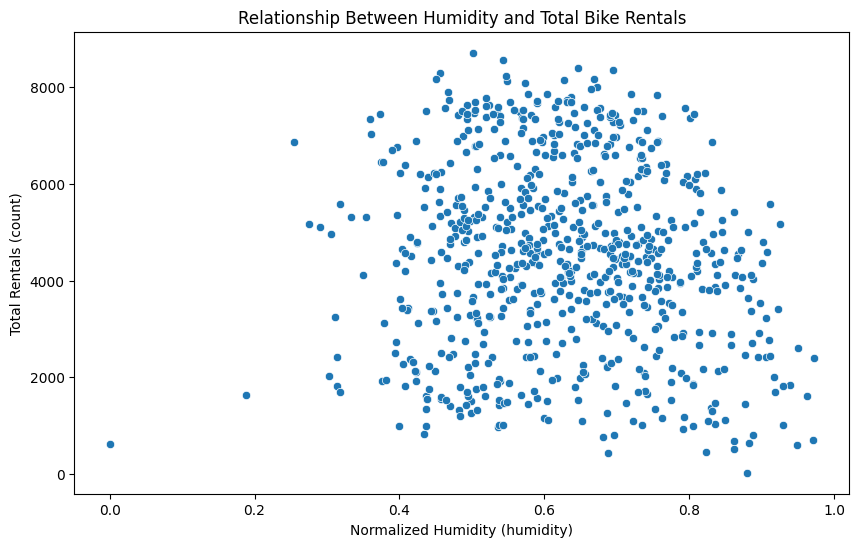

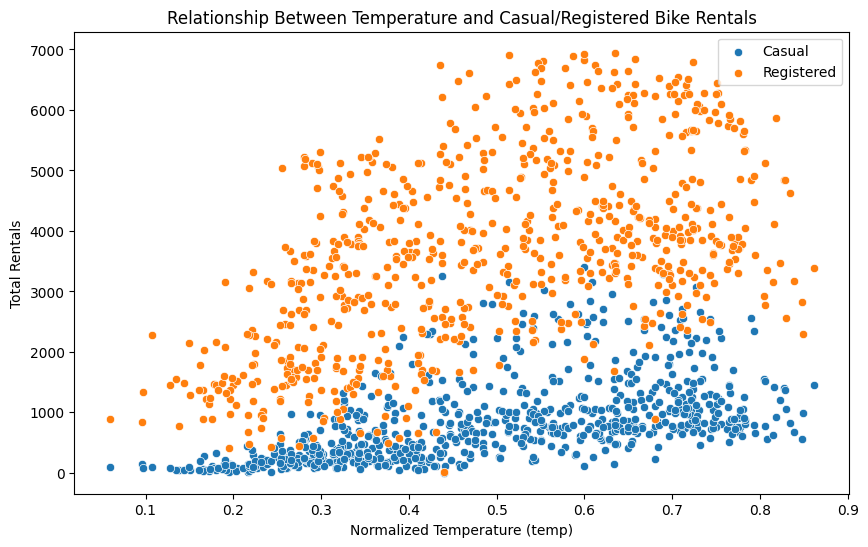

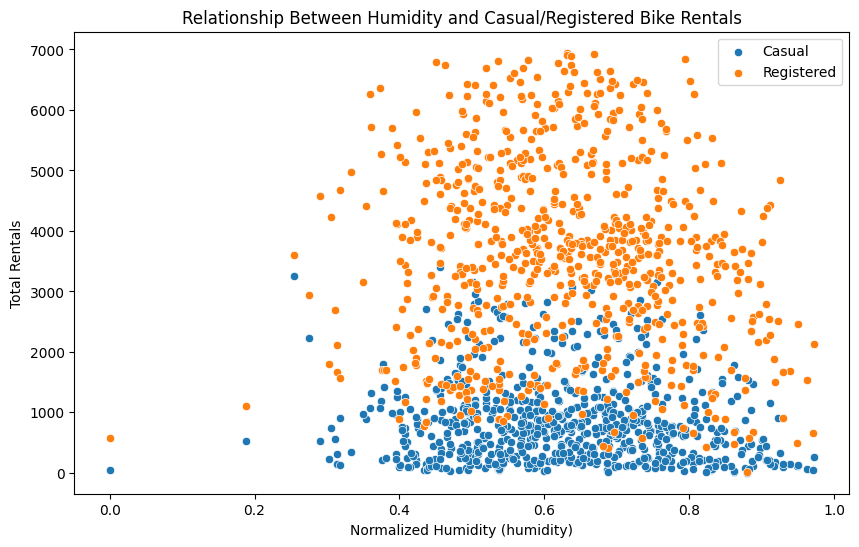

,temp,atemp,humidity,casual,registered,count
temp,1.000000,0.991702,0.126963,0.543285,0.540012,0.627494
atemp,0.991702,1.000000,0.139988,0.543864,0.544192,0.631066
humidity,0.126963,0.139988,1.000000,-0.077008,-0.091089,-0.100659
casual,0.543285,0.543864,-0.077008,1.000000,0.395282,0.672804
registered,0.540012,0.544192,-0.091089,0.395282,1.000000,0.945517
count,0.627494,0.631066,-0.100659,0.672804,0.945517,1.000000


In [27]:

# Create a scatter plot to visualize the relationship between temperature and total rentals
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='count', data=df_day)
plt.title('Relationship Between Temperature and Total Bike Rentals')
plt.xlabel('Normalized Temperature (temp)')
plt.ylabel('Total Rentals (count)')
plt.show()

# Create a scatter plot to visualize the relationship between feels-like temperature and total rentals
plt.figure(figsize=(10, 6))
sns.scatterplot(x='atemp', y='count', data=df_day)
plt.title('Relationship Between Feels-like Temperature and Total Bike Rentals')
plt.xlabel('Normalized Feels-like Temperature (atemp)')
plt.ylabel('Total Rentals (count)')
plt.show()

# Create a scatter plot to visualize the relationship between humidity and total rentals
plt.figure(figsize=(10, 6))
sns.scatterplot(x='humidity', y='count', data=df_day)
plt.title('Relationship Between Humidity and Total Bike Rentals')
plt.xlabel('Normalized Humidity (humidity)')
plt.ylabel('Total Rentals (count)')
plt.show()

# Analyze the relationship between temperature and casual/registered rentals separately
plt.figure(figsize=(10, 6))
sns.scatterplot(x='temp', y='casual', data=df_day, label='Casual')
sns.scatterplot(x='temp', y='registered', data=df_day, label='Registered')
plt.title('Relationship Between Temperature and Casual/Registered Bike Rentals')
plt.xlabel('Normalized Temperature (temp)')
plt.ylabel('Total Rentals')
plt.legend()
plt.show()


# Analyze the relationship between humidity and casual/registered rentals separately
plt.figure(figsize=(10, 6))
sns.scatterplot(x='humidity', y='casual', data=df_day, label='Casual')
sns.scatterplot(x='humidity', y='registered', data=df_day, label='Registered')
plt.title('Relationship Between Humidity and Casual/Registered Bike Rentals')
plt.xlabel('Normalized Humidity (humidity)')
plt.ylabel('Total Rentals')
plt.legend()
plt.show()


# Calculate the correlation between temperature, humidity, and total rentals
correlation_matrix = df_day[['temp', 'atemp', 'humidity', 'casual', 'registered', 'count']].corr()
correlation_matrix

### Pertanyaan 5: Apakah musim memiliki pengaruh terhadap jumlah penyewa sepeda, dilihat dari perbedaan antara pelanggan Casual dan Registered?

<ipython-input-28-b2d8d834905b>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_user_rentals = df_day.groupby('season')[['casual', 'registered']].sum().reset_index()


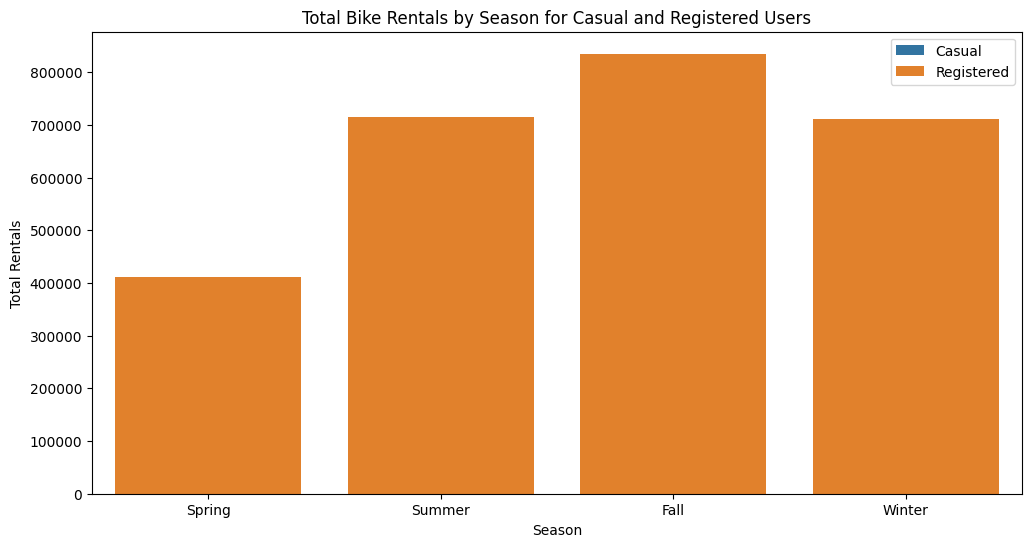

<ipython-input-28-b2d8d834905b>:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_user_rentals_avg = df_day.groupby('season')[['casual', 'registered']].mean().reset_index()


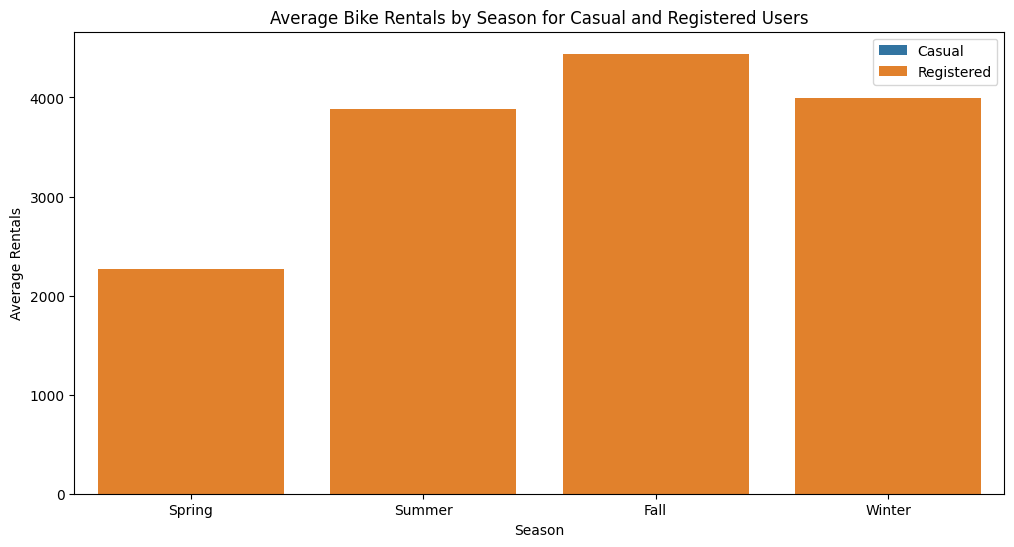

<ipython-input-28-b2d8d834905b>:33: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_user_proportions = df_day.groupby('season')[['casual_proportion', 'registered_proportion']].mean().reset_index()


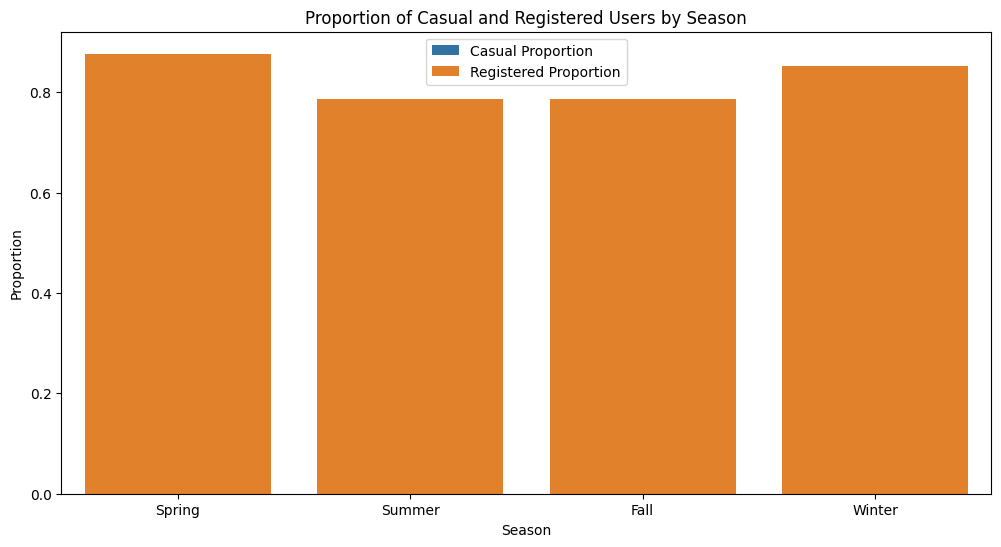

In [28]:

# Group data by season and calculate the total rentals for casual and registered users
seasonal_user_rentals = df_day.groupby('season')[['casual', 'registered']].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='casual', data=seasonal_user_rentals, label='Casual')
sns.barplot(x='season', y='registered', data=seasonal_user_rentals, label='Registered')
plt.title('Total Bike Rentals by Season for Casual and Registered Users')
plt.xlabel('Season')
plt.ylabel('Total Rentals')
plt.legend()
plt.show()

seasonal_user_rentals_avg = df_day.groupby('season')[['casual', 'registered']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='casual', data=seasonal_user_rentals_avg, label='Casual')
sns.barplot(x='season', y='registered', data=seasonal_user_rentals_avg, label='Registered')
plt.title('Average Bike Rentals by Season for Casual and Registered Users')
plt.xlabel('Season')
plt.ylabel('Average Rentals')
plt.legend()
plt.show()

# Analyze the proportion of casual and registered users in each season
df_day['total_users'] = df_day['casual'] + df_day['registered']
df_day['casual_proportion'] = df_day['casual'] / df_day['total_users']
df_day['registered_proportion'] = df_day['registered'] / df_day['total_users']

seasonal_user_proportions = df_day.groupby('season')[['casual_proportion', 'registered_proportion']].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='season', y='casual_proportion', data=seasonal_user_proportions, label='Casual Proportion')
sns.barplot(x='season', y='registered_proportion', data=seasonal_user_proportions, label='Registered Proportion')
plt.title('Proportion of Casual and Registered Users by Season')
plt.xlabel('Season')
plt.ylabel('Proportion')
plt.legend()
plt.show()

**Insight:**

- Average Bike Rentals by Season
 Insight: Musim panas (Summer) memiliki rata-rata penyewaan sepeda tertinggi,
 sedangkan musim gugur (Fall) memiliki rata-rata penyewaan terendah.
 Hal ini menunjukkan bahwa cuaca yang lebih hangat dan cerah pada musim panas
 menjadi faktor yang mendorong minat masyarakat untuk menyewa sepeda.


- Total Bike Rentals by Day of the Week and Working Day
 Insight: Pada hari kerja (Working Day), penggunaan sepeda cenderung lebih tinggi
 dibandingkan dengan hari libur (Non-Working Day).
 Pola ini menunjukkan bahwa sebagian besar penyewa sepeda adalah pengguna yang
 menggunakan sepeda untuk keperluan komuter atau kegiatan harian lainnya.


- Casual Bike Rentals by Weather Condition
 Insight: Jumlah penyewaan sepeda kasual (casual) cenderung lebih rendah pada
 kondisi cuaca yang buruk seperti hujan/salju (Light Rain/Snow, Heavy Rain/Snow).
 Sebaliknya, pada kondisi cuaca cerah (Clear) dan berkabut (Mist),
 penyewaan sepeda kasual lebih tinggi. Hal ini menunjukkan bahwa pengguna
 kasual lebih sensitif terhadap kondisi cuaca dan cenderung tidak menyewa
 sepeda saat cuaca tidak mendukung.


- Registered Bike Rentals by Weather Condition
 Insight: Pengguna terdaftar (registered) kurang terpengaruh oleh kondisi
 cuaca. Mereka tetap menyewa sepeda dalam jumlah yang cukup stabil
 meskipun cuaca sedang buruk.
 Hal ini menunjukkan bahwa pengguna terdaftar mungkin memiliki alasan yang
 lebih kuat untuk menggunakan sepeda, seperti keperluan pekerjaan atau
 komuter yang tidak dapat dihindari.


- Relationship Between Temperature and Total Bike Rentals
 Insight: Semakin tinggi suhu (temp), semakin tinggi juga jumlah total penyewaan
 sepeda. Hal ini menunjukkan bahwa cuaca yang hangat dan cerah
 menjadi faktor yang mendorong minat masyarakat untuk bersepeda.


- Relationship Between Humidity and Total Bike Rentals
 Insight: Semakin tinggi kelembaban (humidity), semakin rendah jumlah total
 penyewaan sepeda. Hal ini menunjukkan bahwa kondisi cuaca yang lembap
 cenderung mengurangi minat masyarakat untuk menyewa sepeda.


- Relationship Between Temperature and Casual/Registered Bike Rentals
 Insight: Pengguna kasual dan terdaftar memiliki pola yang sama dalam
 respon terhadap suhu.  Keduanya cenderung menyewa lebih banyak
 sepeda saat suhu lebih tinggi.
 Namun, pengguna terdaftar secara konsisten menyewa sepeda lebih banyak
 dibandingkan pengguna kasual pada semua kisaran suhu.


- Relationship Between Humidity and Casual/Registered Bike Rentals
 Insight: Pengguna kasual lebih sensitif terhadap kelembaban dibandingkan
 pengguna terdaftar. Jumlah penyewaan sepeda kasual menurun lebih
 signifikan pada kondisi kelembaban yang tinggi dibandingkan
 dengan pengguna terdaftar.


- Total Bike Rentals by Season for Casual and Registered Users
 Insight: Pengguna terdaftar (registered) menyewa sepeda lebih banyak
 sepanjang tahun dibandingkan dengan pengguna kasual.
 Pada musim semi (Spring) dan musim gugur (Fall), perbedaan antara
 jumlah penyewaan pengguna terdaftar dan pengguna kasual cenderung lebih
 besar dibandingkan pada musim panas (Summer) dan musim dingin (Winter).


 -  Proportion of Casual and Registered Users by Season
 Insight: Proporsi pengguna terdaftar (registered) lebih tinggi pada
 sebagian besar musim, terutama pada musim gugur (Fall) dan musim dingin (Winter).
 Proporsi pengguna kasual (casual) lebih tinggi pada musim panas (Summer).
 Hal ini menunjukkan bahwa pengguna kasual lebih banyak menyewa sepeda
 pada cuaca yang hangat dan cerah,
 sedangkan pengguna terdaftar lebih stabil sepanjang tahun.

## Analisis Lanjutan (Opsional)

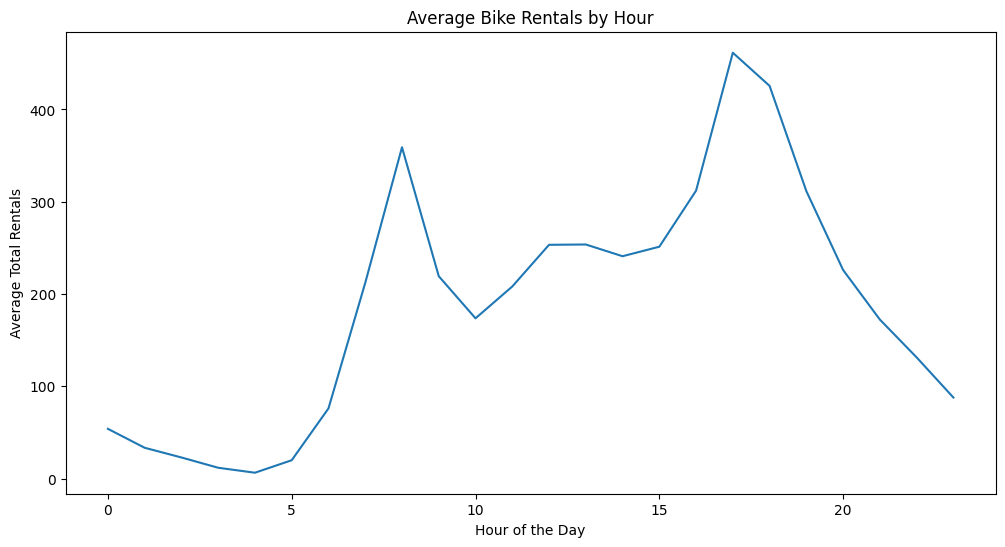

<ipython-input-36-df8dc9aa40e4>:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  holiday_weather_rentals = pd.pivot_table(df_day, values='count', index='holiday', columns='weather_condition', aggfunc='mean')


weather_condition        Clear         Mist  Light Rain/Snow
holiday                                                     
Non-Holiday        4905.154018  4061.684647      1803.285714
Holiday            4029.533333  2998.666667              NaN


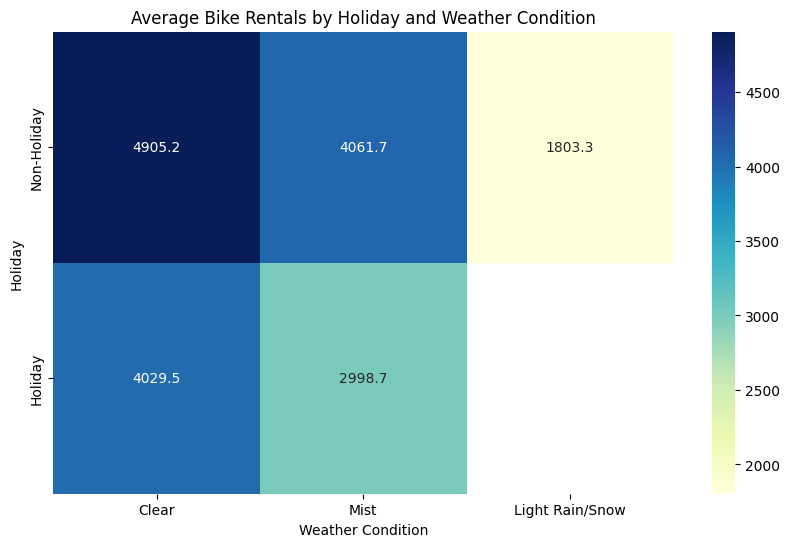

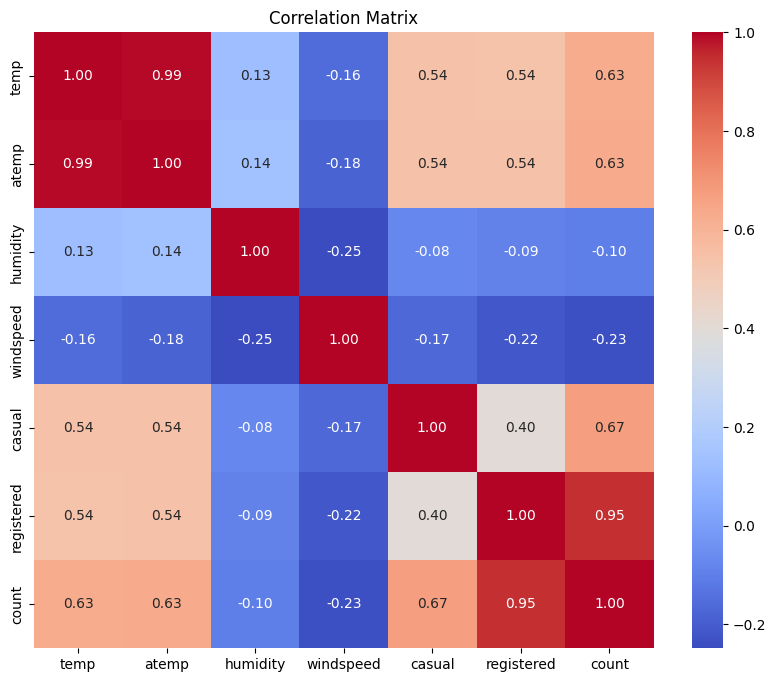

<ipython-input-36-df8dc9aa40e4>:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weekday_rentals = df_day.groupby('day_of_week')['count'].mean().reset_index()


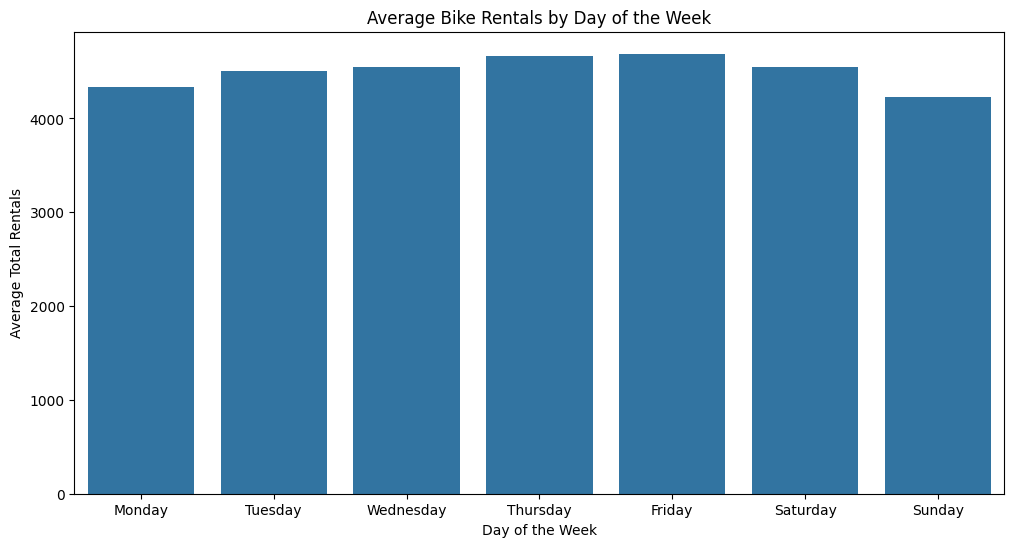

In [36]:

# ### 1. Analisis Tren Penggunaan Sepeda Berdasarkan Waktu (Hourly)

# Mengelompokkan data berdasarkan jam dan menghitung jumlah penyewaan rata-rata
hourly_rentals = df_hour.groupby('hour')['count'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='count', data=hourly_rentals)
plt.title('Average Bike Rentals by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Total Rentals')
plt.show()


# ### 2. Analisis Pengaruh Hari Libur dan Cuaca terhadap Penggunaan Sepeda
holiday_weather_rentals = pd.pivot_table(df_day, values='count', index='holiday', columns='weather_condition', aggfunc='mean')
print(holiday_weather_rentals)

plt.figure(figsize=(10, 6))
sns.heatmap(holiday_weather_rentals, annot=True, cmap='YlGnBu', fmt=".1f")
plt.title('Average Bike Rentals by Holiday and Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Holiday')
plt.show()


# ### 3. Analisis Korelasi antara Variabel-Variabel

# Menghitung korelasi antar variabel numerik
correlation_matrix = df_day[['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# ### 4. Analisis Pengaruh Hari dalam Seminggu terhadap Pola Penggunaan Sepeda
# Mengelompokkan data berdasarkan hari dalam seminggu dan menghitung jumlah penyewaan rata-rata
weekday_rentals = df_day.groupby('day_of_week')['count'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='count', data=weekday_rentals, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Average Bike Rentals by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Total Rentals')
plt.show()




  Insight Tambahan

 - **Tren Penggunaan Sepeda Setiap Jam:**
   - Dari analisis hourly rentals, dapat dilihat bahwa puncak penggunaan sepeda terjadi pada jam-jam sibuk di pagi dan sore hari, yang kemungkinan besar terkait dengan jam berangkat dan pulang kerja.
   - Pengguna sepeda cenderung lebih sedikit pada malam hari dan dini hari.
 - **Interaksi Hari Libur dan Kondisi Cuaca:**
   - Heatmap menunjukkan bahwa jumlah penyewaan sepeda cenderung lebih tinggi pada hari kerja dengan kondisi cuaca cerah.
   - Pada hari libur, pengaruh cuaca terhadap penyewaan sepeda terlihat lebih kecil.
 - **Korelasi antara Variabel:**
   - Korelasi yang kuat antara 'temp' dan 'atemp' menunjukan bahwa suhu udara dan suhu yang terasa memiliki hubungan yang erat.
   - 'Count' (total penyewaan) memiliki korelasi positif yang kuat dengan 'temp' dan 'atemp', menunjukkan bahwa peningkatan suhu berdampak positif pada jumlah penyewaan sepeda.
   - 'Count' memiliki korelasi negatif dengan 'humidity', menunjukkan bahwa kelembaban yang tinggi dapat mengurangi jumlah penyewaan sepeda.
 - **Pengaruh Hari dalam Seminggu:**
   -  Dari analisis average rentals by day of the week, terlihat bahwa jumlah penyewaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan dengan hari libur akhir pekan. Ini menunjukkan bahwa sebagian besar pengguna sepeda adalah pengguna yang menggunakan sepeda untuk keperluan komuter atau kegiatan harian lainnya.

## Conclusion


## Kesimpulan

Berdasarkan analisis data penyewaan sepeda, beberapa kesimpulan dapat ditarik:

**1. Pengaruh Cuaca:**
* Kondisi cuaca sangat mempengaruhi jumlah penyewaan sepeda. Cuaca yang cerah dan hangat cenderung meningkatkan jumlah penyewaan, sedangkan cuaca buruk seperti hujan atau salju mengurangi jumlah penyewaan.
* Pengaruh cuaca lebih terasa pada pengguna kasual daripada pengguna terdaftar, yang menunjukkan bahwa pengguna terdaftar memiliki alasan yang lebih kuat untuk menggunakan sepeda, terlepas dari kondisi cuaca.

**2. Pengaruh Hari Kerja/Libur:**
* Jumlah penyewaan sepeda cenderung lebih tinggi pada hari kerja dibandingkan hari libur, menunjukkan bahwa sebagian besar pengguna sepeda adalah pengguna komuter atau yang menggunakan sepeda untuk keperluan sehari-hari.

**3. Tren Penggunaan Sepeda:**
* Penggunaan sepeda meningkat dari tahun 2011 ke 2012, menunjukkan pertumbuhan minat dalam menggunakan sepeda sebagai moda transportasi atau rekreasi.
* Musim panas memiliki jumlah penyewaan sepeda tertinggi, kemungkinan besar karena cuaca yang lebih hangat dan cerah, sedangkan musim gugur memiliki jumlah penyewaan terendah.

**4. Faktor-Faktor Lain:**
* Suhu dan kelembaban juga mempengaruhi jumlah penyewaan sepeda, dengan suhu yang lebih tinggi dan kelembaban yang lebih rendah cenderung meningkatkan jumlah penyewaan.
* Pengguna terdaftar menyewa sepeda secara konsisten lebih banyak daripada pengguna kasual, dan mereka juga cenderung kurang terpengaruh oleh kondisi cuaca.

**5. Proporsi Pengguna:**
* Proporsi pengguna terdaftar lebih tinggi pada sebagian besar musim, terutama pada musim gugur dan musim dingin.
* Proporsi pengguna kasual lebih tinggi pada musim panas, menunjukkan bahwa mereka lebih banyak menggunakan sepeda saat cuaca hangat dan cerah.

**Secara keseluruhan, analisis ini menunjukkan bahwa berbagai faktor, termasuk cuaca, hari kerja/libur, musim, dan suhu, berpengaruh terhadap jumlah penyewaan sepeda. Memahami pola-pola ini dapat membantu perusahaan penyewaan sepeda dalam mengelola persediaan dan strategi pemasaran mereka.**

**Analisis lebih lanjut dapat dilakukan dengan melihat:**

* Pengaruh gabungan antara cuaca dan hari kerja/libur.
* Pengaruh gabungan antara musim dan suhu.
* Pola penggunaan sepeda berdasarkan jam dan hari dalam seminggu.
* Regresi linear untuk memprediksi jumlah penyewaan.
* Analisis klaster untuk mengelompokkan pengguna sepeda berdasarkan pola penggunaan mereka.
